In [1]:
import tensorflow as tf
import numpy as np 
import matplotlib.pyplot as plt
import glob
from lxml import etree

### 1. 图像信息显示：仅是查看单张图阶段

TensorShape([400, 600, 3])

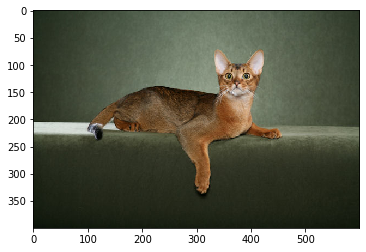

In [2]:
# 文件读取：
img = tf.io.read_file( '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_1.jpg' )
img = tf.image.decode_jpeg(img)
plt.imshow(img)
img.shape

In [3]:
# 头部控制点文件读取：
xml = open( '/home/gaoboyu/学习数据集/图片定位与分割数据集/annotations/xmls/Abyssinian_1.xml' ).read()
# 文本内容抓取：
select = etree.HTML(xml)
# 在size分支下，抓取width和height标签的数据：开头必须是//
width = int( select.xpath( '//size/width/text()' )[0] )      # 宽是x向
height = int( select.xpath( '//size/height/text()' )[0] )    # 高是y向
xmin = int( select.xpath( '//bndbox/xmin/text()' )[0] )
ymin = int( select.xpath( '//bndbox/ymin/text()' )[0] )
xmax = int( select.xpath( '//bndbox/xmax/text()' )[0] )
ymax = int( select.xpath( '//bndbox/ymax/text()' )[0] )

xmin, ymin, xmax, ymax, width, height

(333, 72, 425, 158, 600, 400)

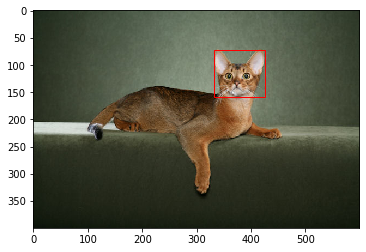

In [4]:
# 画图显示：
# 画矩形框的：(左下角坐标, x向宽度, y向高度, 框内是否填充, 框线是什么颜色)
from matplotlib.patches import Rectangle  
Rect = Rectangle( (xmin,ymin), (xmax-xmin), (ymax-ymin), fill = False, color = 'r' ) 

plt.imshow( img )
ax = plt.gci()  # gci = get current image：获得当前图像的句柄，即后面操作还在当前图上进行
ax.axes.add_patch( Rect )
plt.show()

### 2. 图像预处理：仅是查看单张图阶段

In [5]:
# 先标准化：
img = img / 255

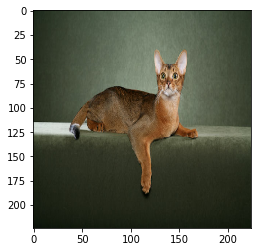

In [6]:
new_height = 224
new_width = 224  
# 等比例放缩放(224,224)：
img = tf.image.resize(img, [new_height,new_width])  # 先高度，再宽度
plt.imshow(img) 

In [7]:
# 4个头部控制点也按同比例放缩：
xmin = ( xmin / width ) * new_width
ymin = ( ymin / height ) * new_height
xmax = ( xmax / width ) * new_width
ymax = ( ymax / height ) * new_height

xmin, xmax, ymin, ymax

(124.32000000000001, 158.66666666666669, 40.32, 88.48)

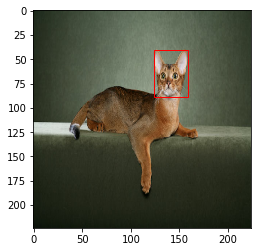

In [8]:
# 画图查看：
Rect = Rectangle( (xmin,ymin), (xmax-xmin), (ymax-ymin), fill = False, color = 'r' ) 
plt.imshow( img )
ax = plt.gci()
ax.axes.add_patch( Rect )
plt.show()

### 3. 获取所有文件的路径：**正式工作开始**！

In [9]:
# 获取所有图片文件地址：
all_image_path = glob.glob( '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/*.jpg' )
len(all_image_path)

7390

In [10]:
# 获取所有位置文件地址：
all_xml_path = glob.glob( '/home/gaoboyu/学习数据集/图片定位与分割数据集/annotations/xmls/*.xml' )
len(all_xml_path)

3686

In [11]:
# 查看一下：
all_xml_path[0:2]

['/home/gaoboyu/学习数据集/图片定位与分割数据集/annotations/xmls/Abyssinian_1.xml',
 '/home/gaoboyu/学习数据集/图片定位与分割数据集/annotations/xmls/Abyssinian_10.xml']

In [12]:
all_image_path[0:2]

['/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_1.jpg',
 '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_10.jpg']

In [13]:
# 获得所有位置文件的标签：中间过渡变量！
all_xml_name = [ x.split('/')[-1].split('.')[0] for x in all_xml_path ]
print( len(all_xml_name) )
all_xml_name[0:2]

3686


['Abyssinian_1', 'Abyssinian_10']

In [14]:
# 获取所有有效图像的地址：有配套的位置文件的那些图
useful_image_path = [ img for img in all_image_path if img.split('/')[-1].split('.')[0] in all_xml_name ]
print( len(useful_image_path) )
useful_image_path[0:2]

3686


['/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_1.jpg',
 '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_10.jpg']

In [15]:
# 获取所有作为model.predict()的图像地址：剩下那些无配套的位置文件的那些图
predict_image_path = [ img for img in all_image_path if img.split('/')[-1].split('.')[0] not in all_xml_name ]
print( len(predict_image_path) )
predict_image_path[0:2]

3704


['/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_104.jpg',
 '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_2.jpg']

In [16]:
# 验证 有效图像 和 对应的位置文件 是否对应：排序后抽查！
useful_image_path.sort( key = lambda x:x.split('/')[-1].split('.')[0] )
all_xml_path.sort( key = lambda x:x.split('/')[-1].split('.')[0] )

# 抽查：
useful_image_path[52:54], all_xml_path[52:54]

(['/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_148.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_149.jpg'],
 ['/home/gaoboyu/学习数据集/图片定位与分割数据集/annotations/xmls/Abyssinian_148.xml',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/annotations/xmls/Abyssinian_149.xml'])

In [17]:
# 列举后面会用到的变量：
useful_image_path, all_xml_path, predict_image_path

(['/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_1.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_10.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_100.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_101.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_102.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_103.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_105.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_106.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_107.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_108.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_109.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_11.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_110.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_111.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_112.jpg',
  '/home/gaoboyu/学习数据集/图片定位与分割数据集/images/Abyssinian_113.jpg',
  '/home/gao

### 4. 解析所有位置文件，并创建label集（class, xmin, ymin, xmax, ymax）

In [18]:
# 对所有位置文件的解析函数：
def xml_to_label( path ):
    xml = open( r'{}'.format(path) ).read()  # 给一个地址即可！
    select = etree.HTML(xml)
    height = int( select.xpath('//size/height/text()')[0] )
    width = int( select.xpath('//size/width/text()')[0] )
    xmin = int( select.xpath('//bndbox/xmin/text()')[0] )
    ymin = int( select.xpath('//bndbox/ymin/text()')[0] )
    xmax = int( select.xpath('//bndbox/xmax/text()')[0] )
    ymax = int( select.xpath('//bndbox/ymax/text()')[0] )
    return [ xmin/width, ymin/height, xmax/width, ymax/height ]  # 直接给相对位置！

**4个回归值：xmin、ymin、xmax、ymax的集和：**

In [19]:
all_xml_label = [ xml_to_label(x) for x in all_xml_path ]
# 查看一下：前3个文件中各4个关键信息（每个list中的元素还是一个list）
all_xml_label[0:3] 

[[0.555, 0.18, 0.7083333333333334, 0.395],
 [0.192, 0.21, 0.768, 0.582],
 [0.383248730964467, 0.142, 0.850253807106599, 0.534]]

In [20]:
# 数据结构变形：[ [所有图的xmin], [所有图的ymin], [所有图的xmax], [所有图的ymax] ] —— zip的反操作！
out_xmin, out_ymin, out_xmax, out_ymax = list( zip(*all_xml_label) )
out_xmin[0:3], type(out_xmin)

((0.555, 0.192, 0.383248730964467), tuple)

In [21]:
# 要放入tf.data.Dataset()中，要把它们转为tensor或array：原先是tuple！
out_xmin = np.array( out_xmin )
out_ymin = np.array( out_ymin )
out_xmax = np.array( out_xmax )
out_ymax = np.array( out_ymax )

**分类标签的集和：**

In [22]:
# 查看一下：分类标签还是最后一个：先按照.分割，再安装_分割！
all_xml_path[0:2]

['/home/gaoboyu/学习数据集/图片定位与分割数据集/annotations/xmls/Abyssinian_1.xml',
 '/home/gaoboyu/学习数据集/图片定位与分割数据集/annotations/xmls/Abyssinian_10.xml']

In [23]:
# 所有有效图片的标签：
useful_image_label = [ x.split('/')[-1].split('.')[0].split('_')[0] for x in all_xml_path ]
print( len(useful_image_label) )
useful_image_label[0:3]

3686


['Abyssinian', 'Abyssinian', 'Abyssinian']

In [24]:
# 一共（无重复）有多少种：
pure_image_label = set( useful_image_label )
len(pure_image_label)  

35

In [25]:
# 把35种转为对应的索引值：
pure_to_index = dict( (name, index) for (index, name) in enumerate(pure_image_label) )
pure_to_index

{'British': 0,
 'boxer': 1,
 'Siamese': 2,
 'yorkshire': 3,
 'american': 4,
 'keeshond': 5,
 'basset': 6,
 'english': 7,
 'Ragdoll': 8,
 'leonberger': 9,
 'Bengal': 10,
 'scottish': 11,
 'japanese': 12,
 'staffordshire': 13,
 'Egyptian': 14,
 'great': 15,
 'havanese': 16,
 'saint': 17,
 'beagle': 18,
 'Persian': 19,
 'Abyssinian': 20,
 'Maine': 21,
 'chihuahua': 22,
 'wheaten': 23,
 'shiba': 24,
 'Russian': 25,
 'Birman': 26,
 'Sphynx': 27,
 'pug': 28,
 'miniature': 29,
 'newfoundland': 30,
 'pomeranian': 31,
 'Bombay': 32,
 'samoyed': 33,
 'german': 34}

In [26]:
# 将所有有效图片的标签转为对应的索引值：
out_class = [ pure_to_index.get(label) for label in useful_image_label ]
print( len(out_class) )
out_class[0:3]

3686


[20, 20, 20]

**所有标签的合并：**

In [27]:
# 创建标签label集：5个分支！
label_dataset = tf.data.Dataset.from_tensor_slices( (out_class, out_xmin, out_ymin, out_xmax, out_ymax) )
label_dataset

<TensorSliceDataset shapes: ((), (), (), (), ()), types: (tf.int32, tf.float64, tf.float64, tf.float64, tf.float64)>

### 5. 创建总数据集：**图片集与标签集合并**

In [28]:
def load_image(path):
    image = tf.io.read_file( path )
    image = tf.image.decode_jpeg( image, channels = 3 )
    image = tf.image.resize( image, [new_height, new_width] )  # 224， 224
    image = image / 127.5 - 1  # 归一化到[-1,1]
    return image

In [29]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

useful_image = tf.data.Dataset.from_tensor_slices( useful_image_path )
useful_image = useful_image.map( load_image, num_parallel_calls = AUTOTUNE )
useful_image

<ParallelMapDataset shapes: (224, 224, 3), types: tf.float32>

In [30]:
# 有效图片集与位置标签合并：
useful_dataset = tf.data.Dataset.zip( (useful_image, label_dataset) )
useful_dataset

<ZipDataset shapes: ((224, 224, 3), ((), (), (), (), ())), types: (tf.float32, (tf.int32, tf.float64, tf.float64, tf.float64, tf.float64))>

In [31]:
# 划分训练集、测试集 = 3000 : 686
train_dataset = useful_dataset.skip(686)
test_dataset = useful_dataset.take(686)

In [32]:
# 乱序、划分batch：
BATCH_SIZE = 32
train_dataset = train_dataset.shuffle(3000).repeat().batch(BATCH_SIZE)
test_dataset = test_dataset.batch(BATCH_SIZE)

tf.Tensor(27, shape=(), dtype=int32)


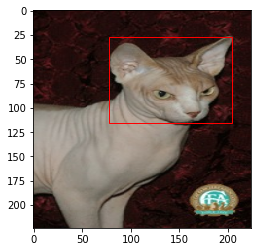

In [33]:
# 再次查看图片：取1张
for image, label in train_dataset.take(1):  # 提取的是一个batch！
    plt.imshow( tf.keras.preprocessing.image.array_to_img( image[0] ) )
    out0, out1, out2, out3, out4 = label
    print(out0[0]) # 26：博美 √
    xmin, ymin, xmax, ymax = out1[0].numpy()*new_width, out2[0].numpy()*new_height, out3[0].numpy()*new_width, out4[0].numpy()*new_height
    
    ax = plt.gci()
    Rect = Rectangle( (xmin,ymin), (xmax-xmin), (ymax-ymin), fill = False, color = 'r' ) 
    ax.axes.add_patch( Rect )
    plt.show()

In [34]:
# 列举后面会用到的变量：
train_dataset, test_dataset

(<BatchDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,), (None,))), types: (tf.float32, (tf.int32, tf.float64, tf.float64, tf.float64, tf.float64))>,
 <BatchDataset shapes: ((None, 224, 224, 3), ((None,), (None,), (None,), (None,), (None,))), types: (tf.float32, (tf.int32, tf.float64, tf.float64, tf.float64, tf.float64))>)

### 6. 模型搭建：

In [35]:
xception = tf.keras.applications.Xception( weights = 'imagenet', include_top = False, input_shape = (224,224,3) )

In [36]:
# 所有分支前共有的部分：
inputs = tf.keras.layers.Input( shape = (224,224,3) )
x = xception(inputs)
x = tf.keras.layers.GlobalAveragePooling2D()(x)  
x = tf.keras.layers.Dense( 2048, activation = 'relu' )(x)
x = tf.keras.layers.Dense( 256, activation = 'relu' )(x)

In [37]:
# 分类部分：
out_class = tf.keras.layers.Dense(37, activation = 'softmax', name = 'out_class')(x)
# 回归部分：
out_xmin = tf.keras.layers.Dense(1, name = 'out_xmin')(x)
out_ymin = tf.keras.layers.Dense(1, name = 'out_ymin')(x)
out_xmax = tf.keras.layers.Dense(1, name = 'out_xmax')(x)
out_ymax = tf.keras.layers.Dense(1, name = 'out_ymax')(x)

In [38]:
# 输出汇总：
prediction = [out_class, out_xmin, out_ymin, out_xmax, out_ymax]

In [39]:
# 模型搭建：
model = tf.keras.models.Model( inputs = inputs, outputs = prediction )

In [40]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
xception (Model)                (None, 7, 7, 2048)   20861480    input_2[0][0]                    
__________________________________________________________________________________________________
global_average_pooling2d (Globa (None, 2048)         0           xception[1][0]                   
__________________________________________________________________________________________________
dense (Dense)                   (None, 2048)         4196352     global_average_pooling2d[0][0]   
______________________________________________________________________________________________

In [41]:
# 模型编译：学习率小一点！
model.compile(
    tf.keras.optimizers.Adam( lr = 0.0001 ),  # 全局优化：只有一个！
    loss = { 'out_class':'sparse_categorical_crossentropy', 
             'out_xmin':'mse', 
             'out_ymin':'mse', 
             'out_xmax':'mse', 
             'out_ymax':'mse'},
    metrics = ['mae']  # 用平均绝对误差！
)

In [42]:
# 用回调函数保存模型：
checkpoint_path = r'/home/gaoboyu/学习保存的模型/cp.ckpt' # 设置保存的路径
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath = checkpoint_path, save_freq = 'epoch')

In [43]:
# 训练：
EPOCHES = 10
history = model.fit(
    train_dataset,
    epochs = EPOCHES,
    steps_per_epoch = 3000 // BATCH_SIZE,
    validation_data = test_dataset,
    validation_steps = 686 // BATCH_SIZE,
    # 回调函数保存模型：
    callbacks = [cp_callback]
)

SyntaxError: invalid syntax (<ipython-input-43-ee1592a32157>, line 2)

### 7. 创建预测数据集 + 模型预测：

In [45]:
# 创建预测数据集：
AUTOTUNE = tf.data.experimental.AUTOTUNE

predict_image = tf.data.Dataset.from_tensor_slices( predict_image_path )
predict_dataset = predict_image.map( load_image, num_parallel_calls = AUTOTUNE )
predict_dataset

<ParallelMapDataset shapes: (224, 224, 3), types: tf.float32>

In [46]:
# 划分一下batch：
predict_dataset = predict_dataset.batch(BATCH_SIZE)

20
20
20
20
20
20


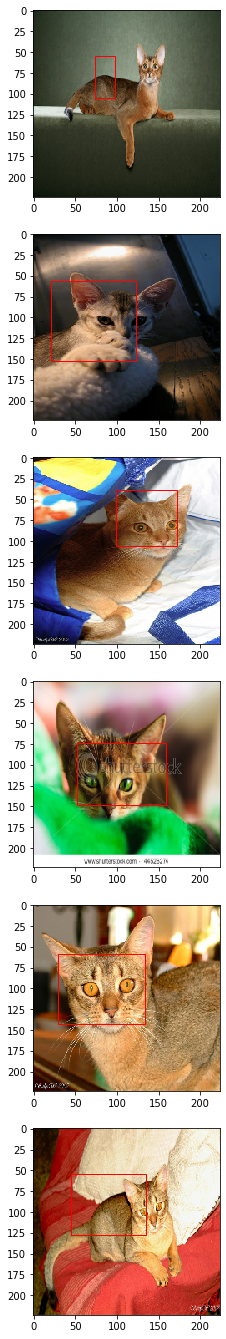

In [64]:
# 画图进行预测：
plt.figure( figsize=(8, 24) )
for img, _ in test_dataset.take(1):
    out0, out1, out2, out3, out4 = model.predict(img)
    # 查看6张图：
    for i in range(6):
        print( np.argmax(out0[0]) )
        plt.subplot(6, 1, i+1)  # 注意：子图数值是从1开始的！不是从0
        plt.imshow( tf.keras.preprocessing.image.array_to_img(img[i]) )  # 将张量转为array
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
        ax = plt.gca()
        ax.axes.add_patch(rect)

In [76]:
out0.shape

(32, 37)

In [67]:
new_model = tf.keras.models.load_model( '/home/gaoboyu/学习保存的模型/epoch50.h5' )

20
20
20
20
20
20
20
20


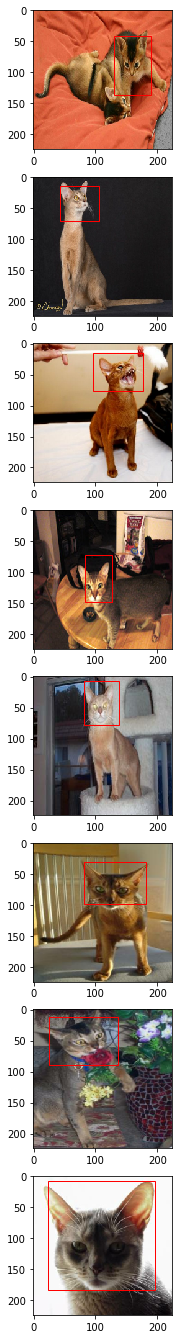

In [74]:
# 画图进行预测：
plt.figure( figsize=(8, 24) )
for img in predict_dataset.take(1):
    out1, out2, out3, out4 = new_model.predict(img)
    # 查看6张图：
    for i in range(8):
        print( np.argmax(out0[0]) )
        plt.subplot(8, 1, i+1)  # 注意：子图数值是从1开始的！不是从0
        plt.imshow( tf.keras.preprocessing.image.array_to_img(img[i]) )  # 将张量转为array
        xmin, ymin, xmax, ymax = out1[i]*224, out2[i]*224, out3[i]*224, out4[i]*224
        rect = Rectangle((xmin, ymin), (xmax-xmin), (ymax-ymin), fill=False, color='red')
        ax = plt.gca()
        ax.axes.add_patch(rect)

In [2]:
a1 = [0, 1, 2, 3, 4]
a2 = [0, 1, 2, 2, 3]
m = tf.metrics.MeanIoU( num_classes = 5 )

In [3]:
m(a1,a2)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [4]:
a11 = [0, 1, 2, 3, 4]
a22 = [0, 1, 2, 2, 3]
m1 = tf.keras.metrics.MeanIoU( num_classes = 5 )

In [5]:
m1(a11,a22)

<tf.Tensor: shape=(), dtype=float32, numpy=0.5>

In [7]:
b1 = np.array( [[0,1,2],[0,3,1],[2,3,1]] )
b2 = np.array( [[1,2,3],[0,3,2],[2,1,1]] )
n = tf.metrics.MeanIoU( num_classes = 4 )

In [8]:
n(b1,b2)

<tf.Tensor: shape=(), dtype=float32, numpy=0.32083333>

In [9]:
n1 = tf.metrics.MeanIoU( num_classes = 4 )

In [10]:
n1(b1,b2)

<tf.Tensor: shape=(), dtype=float32, numpy=0.32083333>